In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [93]:
health_data = pd.read_csv('synthetic_health_data.csv')
health_data.head(10)

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
5,37.190357,26.967427,2,89.124837,7.786489,1,1.593758,100.000000
6,58.950554,29.475966,5,81.522693,7.085705,0,3.622786,91.385675
7,49.209217,28.175859,3,65.002425,8.386293,0,0.235395,94.853895
8,34.366307,30.247764,4,67.989301,4.058009,1,0.327432,78.356157
9,46.510721,22.323824,4,33.889837,6.153408,0,5.024877,64.380280


In [94]:
health_data.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [95]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


**Mengecek Nilai NULL**

In [96]:
health_data.isnull().sum()

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

**Mengecek Missing Values**

In [97]:
missing_values = health_data.isnull().sum()
print(missing_values)

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


**Mengecek Data Duplikat**

In [98]:
health_data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

**MEMBUAT KORELASI MATRIKS**

In [99]:
corr_matrix = health_data.corr()
corr_matrix["Health_Score"].sort_values(ascending=False)

Health_Score           1.000000
Diet_Quality           0.680686
Sleep_Hours            0.269033
Exercise_Frequency     0.245036
Smoking_Status        -0.109123
Alcohol_Consumption   -0.138264
Age                   -0.186939
BMI                   -0.415147
Name: Health_Score, dtype: float64

**VISUALISASI DARI KORELASI MATRIKS**

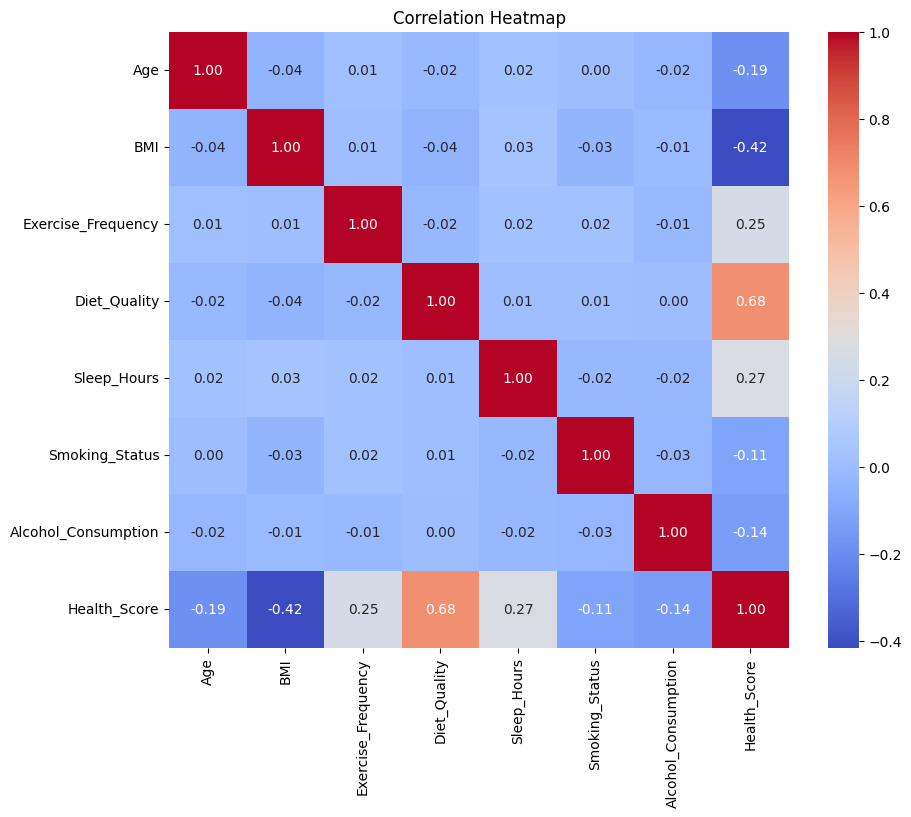

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**MENAMPILKAN DISTRIBUSI KESELURUHAN FIRUR DATA**

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(dataframe):
    num_cols = len(dataframe.columns)

    # Hitung jumlah kolom per baris (misal dibagi dua baris)
    cols_per_row = (num_cols + 1) // 2

    # Tentukan ukuran figure agar hasilnya proporsional
    plt.figure(figsize=(5 * cols_per_row, 8))

    # Loop untuk setiap kolom dan buat subplot
    for i, col in enumerate(dataframe.columns):
        plt.subplot(2, cols_per_row, i + 1)  # 2 baris, n kolom per baris
        sns.histplot(data=dataframe, x=col, kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()


**VISUALISASINYA**

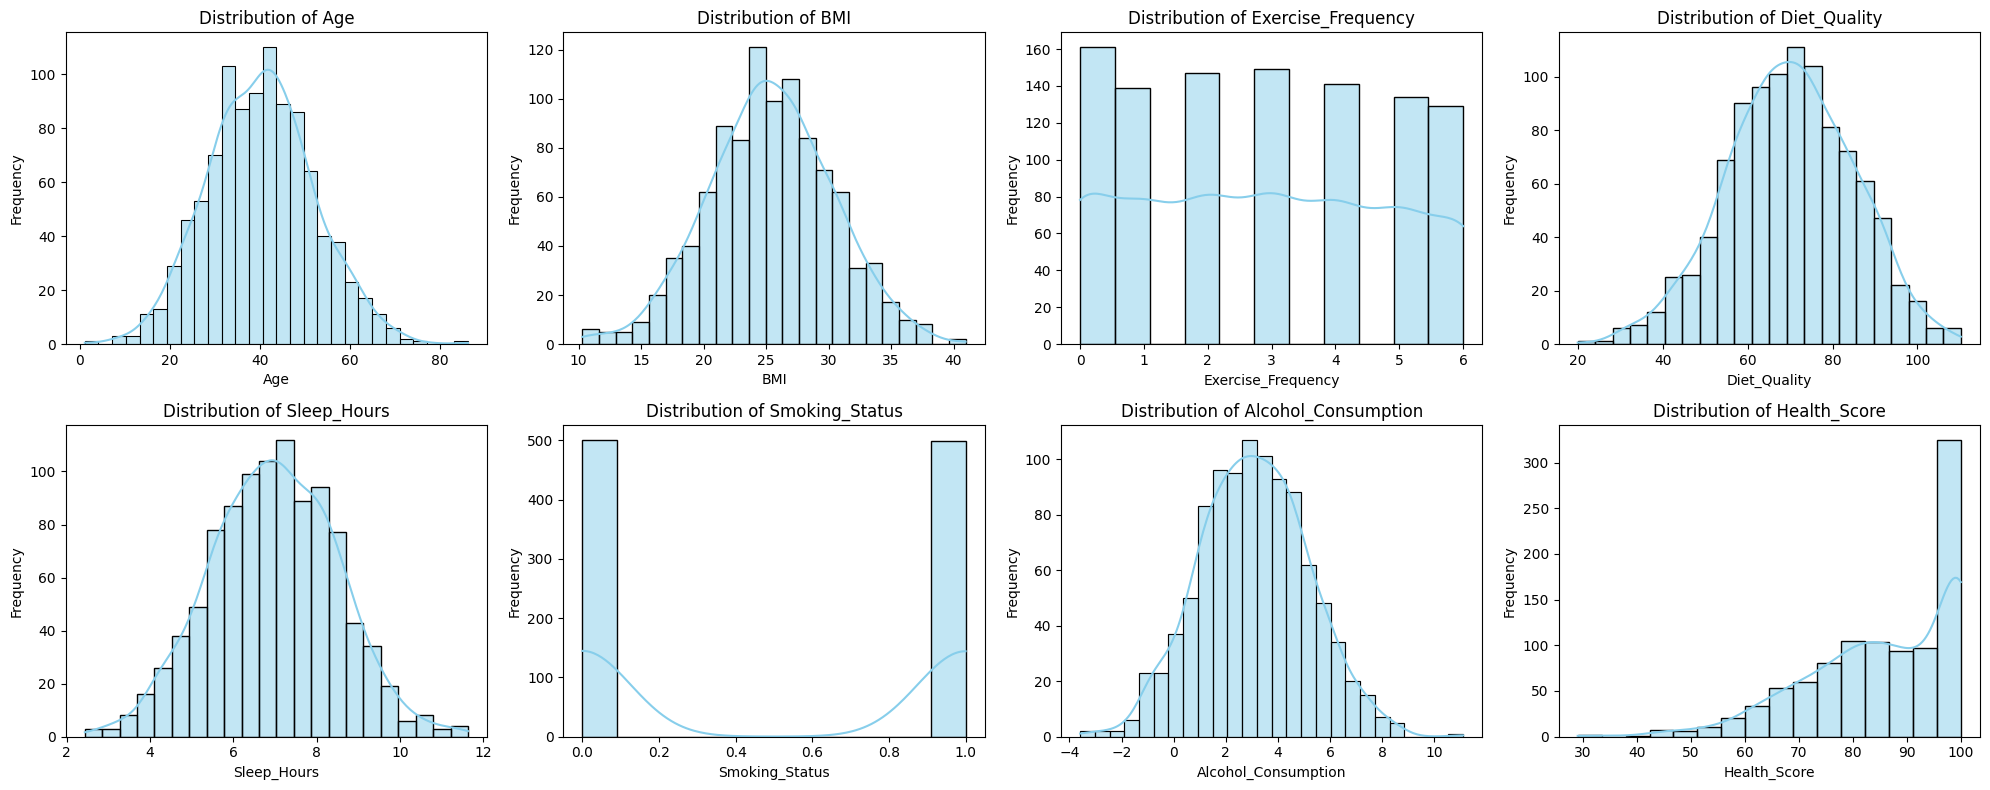

In [102]:
plot_dist(health_data)

**VISUALISASINYA DALAM BENTUK BOXPLOT**

<Axes: >

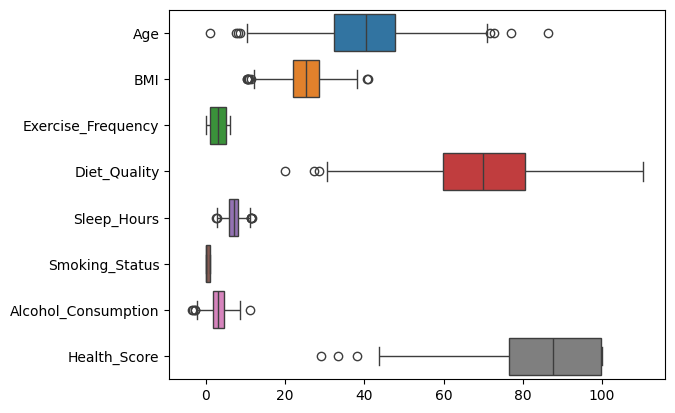

In [103]:
sns.boxplot(health_data, orient='h')

**VISUALISASI DALAM BENTUK SCATTER**

Text(0, 0.5, 'Health Score')

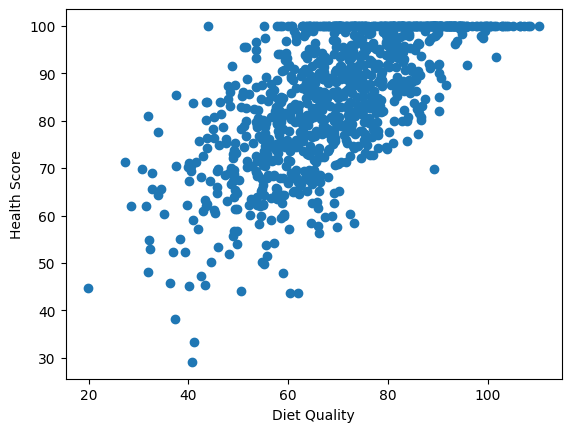

In [104]:
plt.scatter(health_data.Diet_Quality, health_data.Health_Score)
plt.xlabel("Diet Quality")
plt.ylabel("Health Score")

# **DATA PREPOCESSING**

In [105]:
X = health_data.drop("Health_Score", axis=1)
y = health_data.Health_Score

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Implementasi Fitur Recursive Feature Elimination**

In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Misal dataset sudah kamu load jadi DataFrame
# df = pd.read_csv("data.csv")

# 1. Pisahkan fitur dan target
X = health_data.drop(columns=["Health_Score"])
y = health_data["Health_Score"]

# 2. Model regresi linear
model = LinearRegression()

# 3. Terapkan RFE untuk memilih 4 fitur terbaik
selector = RFE(estimator=model, n_features_to_select=4)
selector.fit(X, y)

# 4. Hasil seleksi
selected_features = X.columns[selector.support_]
ranking = selector.ranking_

print("Fitur terpilih:", list(selected_features))
print("Ranking fitur:", ranking)

# 5. Evaluasi model dengan fitur terpilih
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Fitur terpilih: ['BMI', 'Exercise_Frequency', 'Sleep_Hours', 'Smoking_Status']
Ranking fitur: [4 1 1 3 1 1 2]
MSE: 139.21078047570754
R²: 0.28595858408032904


# **MODELING**

**LINEAR REGRESSION**

In [109]:
lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)

print("Coefficients:", lreg_model.coef_)
print("Intercept:", lreg_model.intercept_)

Coefficients: [-1.17224867  1.75871616  2.36349036 -3.76504388]
Intercept: 95.79779140455273


In [110]:
y_pred = lreg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared:", r2)

Mean Squared Error: 139.21078047570754
R Squared: 0.28595858408032904


**DILAKUKAN SCATTER FUNGSINYA UNTUK MEMBATASI NILAI PREDIKSI AGAR TIDAK MELEWATI BATAS TERTENTU.**

In [111]:
def scatter(y_test, y_pred):

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()



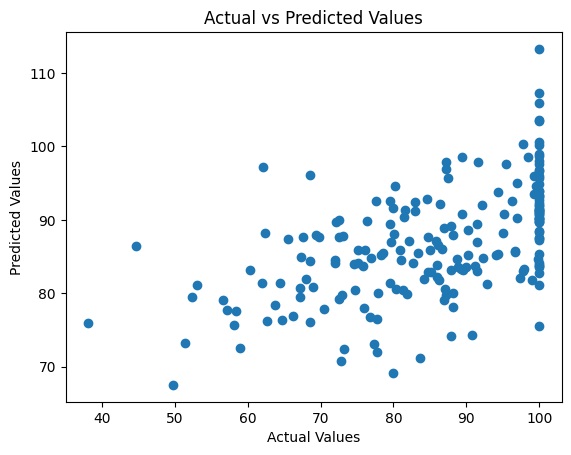

In [112]:
scatter(y_test, y_pred)

Health_Score dapat memiliki nilai maksimum 100, tetapi model menghasilkan keluaran dengan nilai lebih tinggi dari ini. Jika kita menetapkan nilai ini sama dengan 100, akurasi akan meningkat.

Mean Squared Error: 137.75220613499863
R Squared: 0.2934399191026955


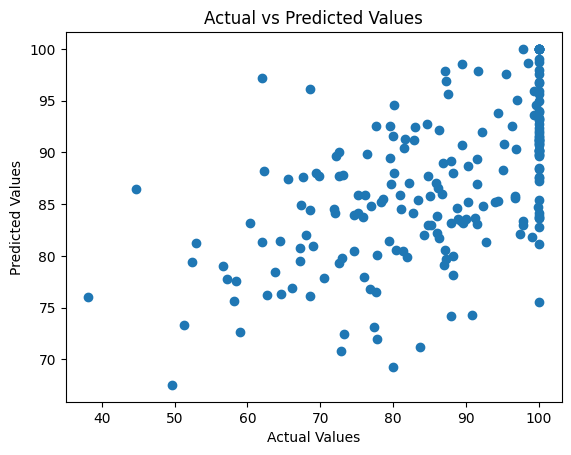

In [113]:
y_pred = np.clip(y_pred, 0, 100)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared:", r2)
scatter(y_test, y_pred)

**POLYNOMIAL REGRESSION**

In [114]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [115]:
poly_lreg_model = LinearRegression()
poly_lreg_model.fit(X_train_poly, y_train)

print("Coefficients:", poly_lreg_model.coef_)
print("Intercept:", poly_lreg_model.intercept_)

Coefficients: [ 1.89982086e-16 -1.12694890e+00 -2.98794151e+00  2.36760064e+00
  5.53277639e+00  1.94512055e+00 -8.94712299e-01 -1.17244718e+00
  1.61288943e-01 -3.06268328e-01  5.83166577e-01  8.93250201e-01
  3.21048418e-02 -4.54471597e-01 -2.45964417e-01 -4.29640840e-01
  6.66229183e-01  1.68243183e+00  6.20019000e-01 -2.27089357e-01
 -1.75936238e-01 -7.43194505e-02 -7.05653124e-01 -3.83533835e-01
  5.70069821e-01  3.25020123e-01 -1.26890089e+00 -1.11690732e+00
  8.21968328e-01  1.14954389e+00 -2.59292675e-01  4.43356075e-01
 -5.28800054e-02  1.34210620e-02 -1.84381313e-01  2.64855712e-02
 -5.01693824e-02  1.88044422e-01 -1.86160702e-01 -1.58917624e-01
 -1.48196691e-01  6.94764682e-02  2.63782957e-02  2.33784762e-02
 -1.20568895e-01 -1.78662953e-01  3.27183256e-02  2.46632288e-01
  4.25267910e-02 -4.47352482e-01  2.44209814e-01  7.55512016e-02
 -1.62639999e-01  6.74686137e-02  2.36544489e-01  2.79537287e-01
  1.18713168e-01  2.09578968e-01 -2.21774182e-02 -1.71209825e-01
 -1.5183615

Mean Squared Error: 23.77849722892989
R Squared: 0.8780350790954017


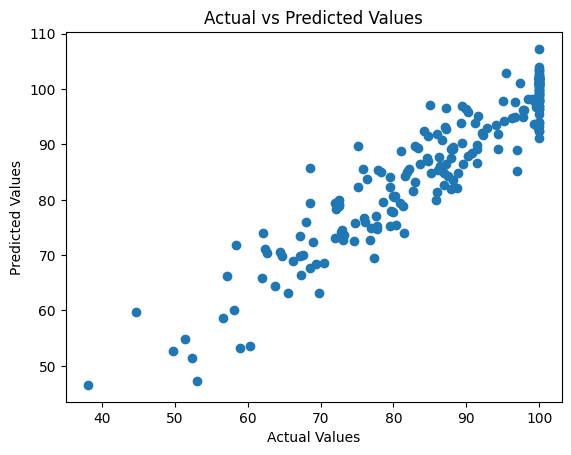

In [116]:
y_pred = poly_lreg_model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared:", r2)
scatter(y_test, y_pred)

**DILAKUKAN JUGA SCATTER**

Mean Squared Error: 22.75295209599043
R Squared: 0.8832953160993986


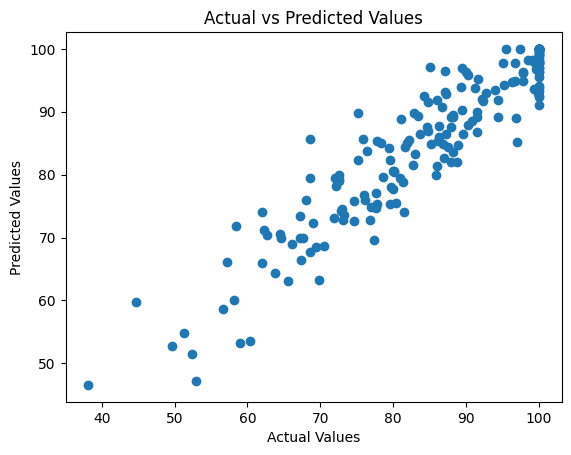

In [117]:
y_pred = np.clip(y_pred, 0, 100)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R Squared:", r2)
scatter(y_test, y_pred)

In [118]:
import joblib

# Simpan model Polynomial Regression
joblib.dump(poly_lreg_model, "Polynomial_regression.pkl")
print("Model Polynomial Regression berhasil disimpan!")

Model Polynomial Regression berhasil disimpan!


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib

# 1. Load Dataset
health_data = pd.read_csv('synthetic_health_data.csv')

# 2. Pisahkan fitur (X) dan label (y)
X = health_data.drop(columns=['Health_Score'])  # fitur
y = health_data['Health_Score']                 # target

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Buat pipeline Polynomial Regression (sudah termasuk Scaler + PolynomialFeatures + LinearRegression)
poly_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),                     # scaling otomatis
    ("poly_features", PolynomialFeatures(degree=3)),  # polynomial degree=3
    ("lin_reg", LinearRegression())
])

# 5. Latih model
poly_reg_pipeline.fit(X_train, y_train)

# 6. Simpan model ke file
joblib.dump(poly_reg_pipeline, "Polynomial_regression.pkl")
print("Model Polynomial Regression berhasil disimpan ke file: Polynomial_regression.pkl")

# 7. Load kembali model (opsional)
loaded_model = joblib.load("Polynomial_regression.pkl")

# 8. Contoh prediksi
y_pred = loaded_model.predict(X_test)
print("Contoh hasil prediksi:", y_pred[:5])


Model Polynomial Regression berhasil disimpan ke file: Polynomial_regression.pkl
Contoh hasil prediksi: [85.60557418 98.41401439 88.05583384 82.99902781 99.45303562]


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Load Dataset
health_data = pd.read_csv('synthetic_health_data.csv')

# 2. Tentukan fitur hasil seleksi RFE dan target
selected_features = ['BMI', 'Exercise_Frequency', 'Sleep_Hours', 'Smoking_Status']
target_column = 'Health_Score'

# Pastikan kolom tersedia dalam dataset
X = health_data[selected_features]
y = health_data[target_column]

# 3. Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Lakukan standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Simpan Scaler ke file .pkl
scaler_filename = "HealthScaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler berhasil disimpan ke file: {scaler_filename}")

# 6. (Opsional) Load kembali Scaler
loaded_scaler = joblib.load(scaler_filename)
print("Scaler berhasil dimuat kembali!")

Scaler berhasil disimpan ke file: HealthScaler.pkl
Scaler berhasil dimuat kembali!
